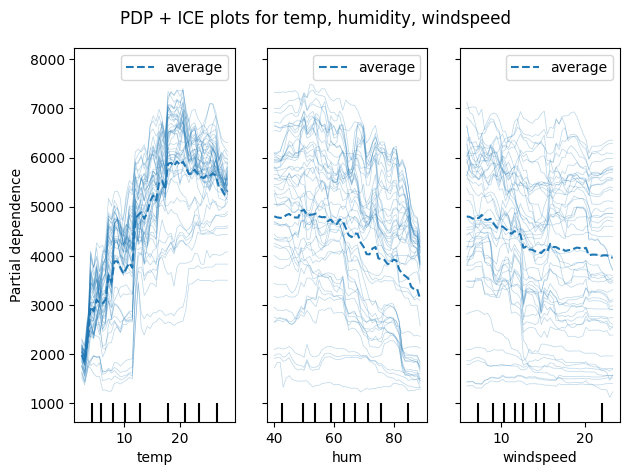


Permutation Feature Importance:
     feature  importance_mean  importance_std
0       temp         0.854283        0.104889
1        hum         0.324686        0.073213
2  windspeed         0.047624        0.014348


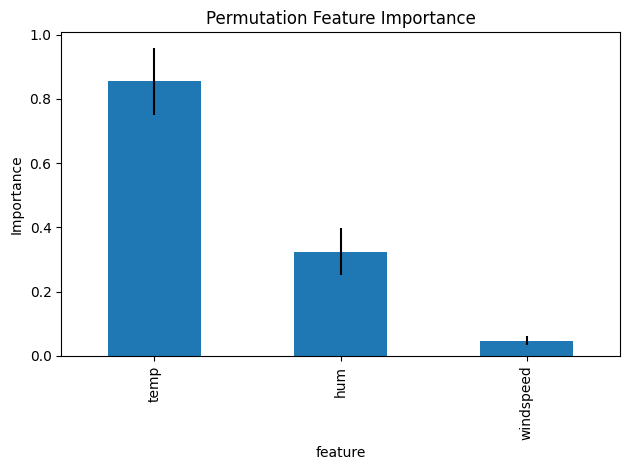

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("bike.csv")

# Step 2: Prepare the data
# Assume target column is 'count' and features are typical: temp, humidity, windspeed, etc.
X = df[['temp', 'hum', 'windspeed']]
y = df['cnt']

# Optionally scale the data (not necessary for tree-based models but okay for inspection)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Plot PDP and ICE
features = ['temp', 'hum', 'windspeed']

# PDP + ICE combined (scikit-learn >= 0.24)
display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features,
    kind="both",  # 'average' for PDP, 'individual' for ICE, 'both' for combined
    subsample=50,  # fewer lines for ICE
    n_jobs=1,
    grid_resolution=50
)
plt.suptitle("PDP + ICE plots for temp, humidity, windspeed")
plt.tight_layout()
plt.show()

# Step 5: Permutation Feature Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Show feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("\nPermutation Feature Importance:")
print(importance_df)

# Optional: Plot feature importances
importance_df.plot.bar(x='feature', y='importance_mean', yerr='importance_std', legend=False)
plt.title("Permutation Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



Manual Permutation Feature Importance:
     feature  importance_mean  importance_std
0       temp         0.944456        0.150780
1        hum         0.290901        0.045509
2  windspeed         0.041165        0.023136


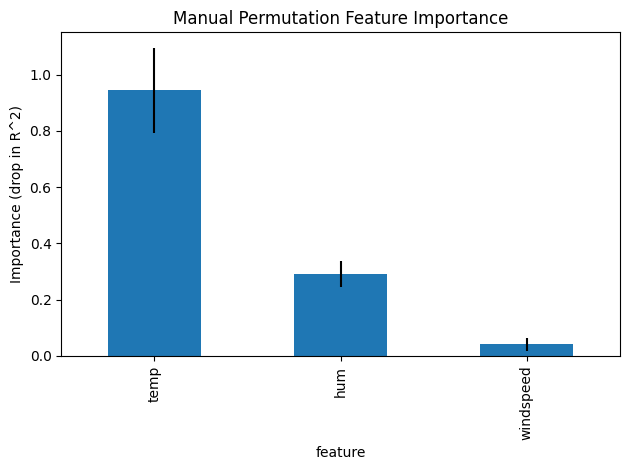

In [12]:
## b)
import numpy as np

# Step 6: Manual permutation importance
baseline_score = model.score(X_test, y_test)  # R^2 score by default

manual_importances = []
n_repeats = 10

for col in X_test.columns:
    scores = []
    for _ in range(n_repeats):
        X_test_permuted = X_test.copy()
        X_test_permuted[col] = np.random.permutation(X_test_permuted[col].values)
        score = model.score(X_test_permuted, y_test)
        scores.append(baseline_score - score)  # Importance: drop in performance
    manual_importances.append({
        "feature": col,
        "importance_mean": np.mean(scores),
        "importance_std": np.std(scores)
    })

manual_importance_df = pd.DataFrame(manual_importances).sort_values(by="importance_mean", ascending=False)

print("\nManual Permutation Feature Importance:")
print(manual_importance_df)

# Plot manually computed importances
manual_importance_df.plot.bar(
    x='feature', y='importance_mean', yerr='importance_std', legend=False
)
plt.title("Manual Permutation Feature Importance")
plt.ylabel("Importance (drop in R^2)")
plt.tight_layout()
plt.show()


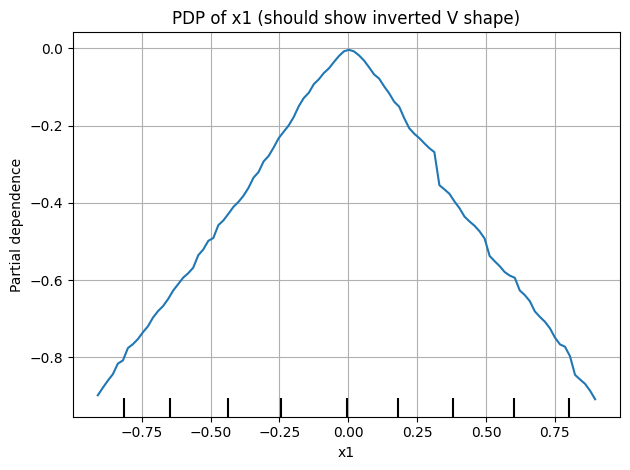

In [14]:
# c)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# Step 1: Create synthetic data
np.random.seed(42)
n_samples = 1000
x1 = np.random.uniform(-1, 1, size=n_samples)
x2 = np.random.normal(0, 1, size=n_samples)

# y is defined to follow an inverted V shape with respect to x1
y = -np.abs(x1) + 0.1 * x2  # add small noise from x2

# Step 2: Train RandomForestRegressor
X = pd.DataFrame({'x1': x1, 'x2': x2})
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Step 3: Plot PDP for x1
PartialDependenceDisplay.from_estimator(model, X, ['x1'], kind='average')
plt.title("PDP of x1 (should show inverted V shape)")
plt.grid(True)
plt.tight_layout()
plt.show()
